FileNotFoundError: [WinError 3] The system cannot find the path specified: 'analysis'

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

video_path = 'USvideos.csv'
df = pd.read_csv(f'analysis/{video_path}')
print("✅ Loaded:", video_path)
print("Shape:", df.shape)

display(df.head())
print(df.columns)

with open('analysis/US_category_id.json', 'r') as f:
    category_data = json.load(f)

categories = pd.json_normalize(category_data["items"])
categories = categories[['id', 'snippet.title']]
categories.columns = ['category_id', 'category']

df['category_id'] = df['category_id'].astype(str)
categories['category_id'] = categories['category_id'].astype(str)
df = df.merge(categories, on='category_id', how='left')

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

print("\n🧪 Missing values:")
print(df.isnull().sum())

top_videos = df.sort_values('views', ascending=False).head(10)
plt.figure()
sns.barplot(x='views', y='title', data=top_videos)
plt.title('🔥 Top 10 Trending Videos by Views (US)')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df, x='likes', y='views', alpha=0.4)
plt.title('👍 Likes vs 👀 Views (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

top_categories = (
    df.groupby('category')['views']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("🏆 Top 10 Categories by Avg Views (US)")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='publish_hour', data=df, palette='magma')
plt.title("⏰ Videos Published by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

df['trending_date_only'] = df['trending_date'].dt.date
daily_trends = df.groupby('trending_date_only').size()

plt.figure()
daily_trends.plot(marker='o')
plt.title("📅 Trending Videos Per Day (US)")
plt.xlabel("Date")
plt.ylabel("Video Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🎉 YouTube US Trend Analysis Complete.")


FileNotFoundError: [Errno 2] No such file or directory: 'analysis/USvideos.csv'

✅ Loaded: C:\Users\harini\Documents\analysis\USvideos.csv
Shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

🧪 Missing values:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
publish_hour                0
dtype: int64


C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:43: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


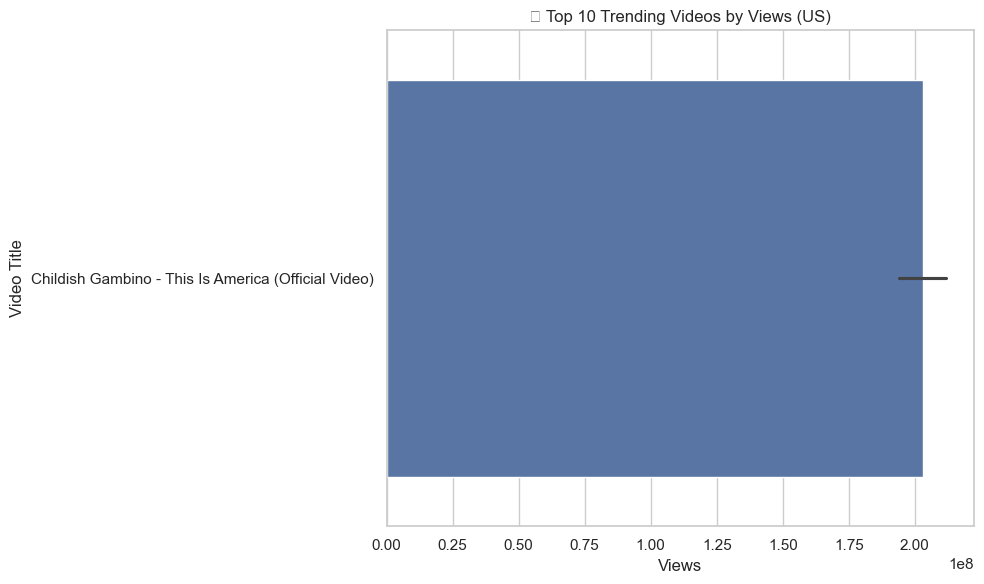

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:53: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:53: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


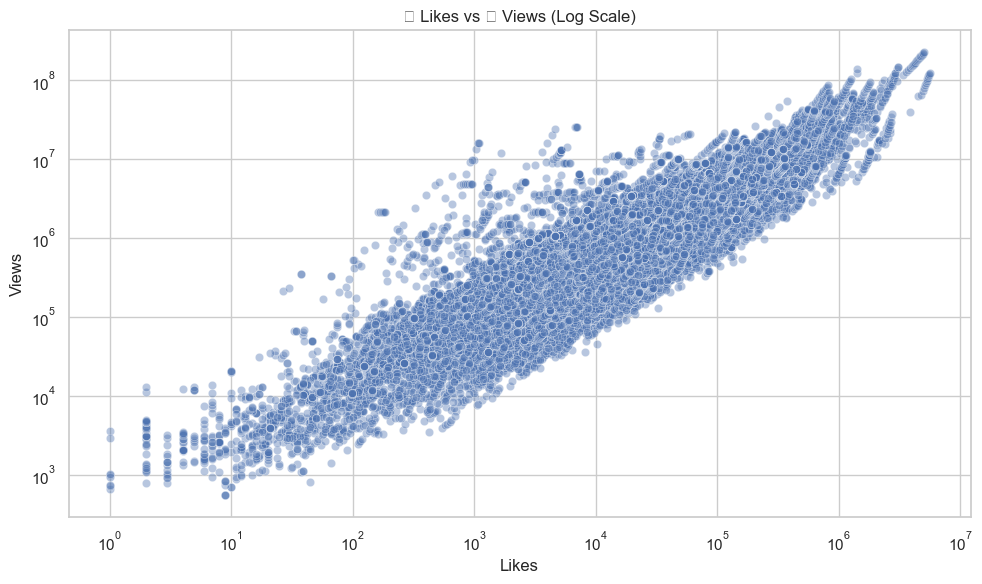

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:68: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


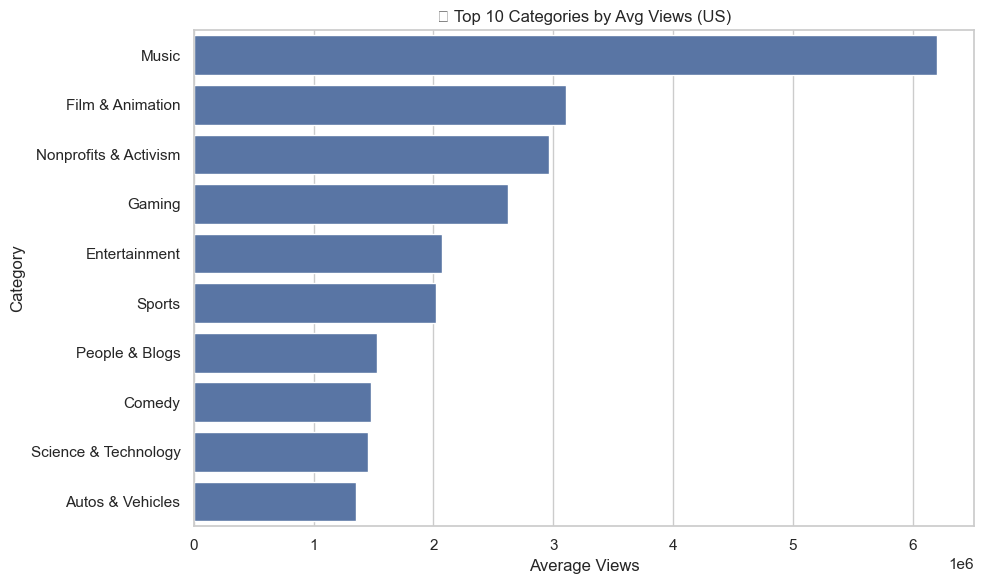

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=df, palette='magma')
C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:76: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


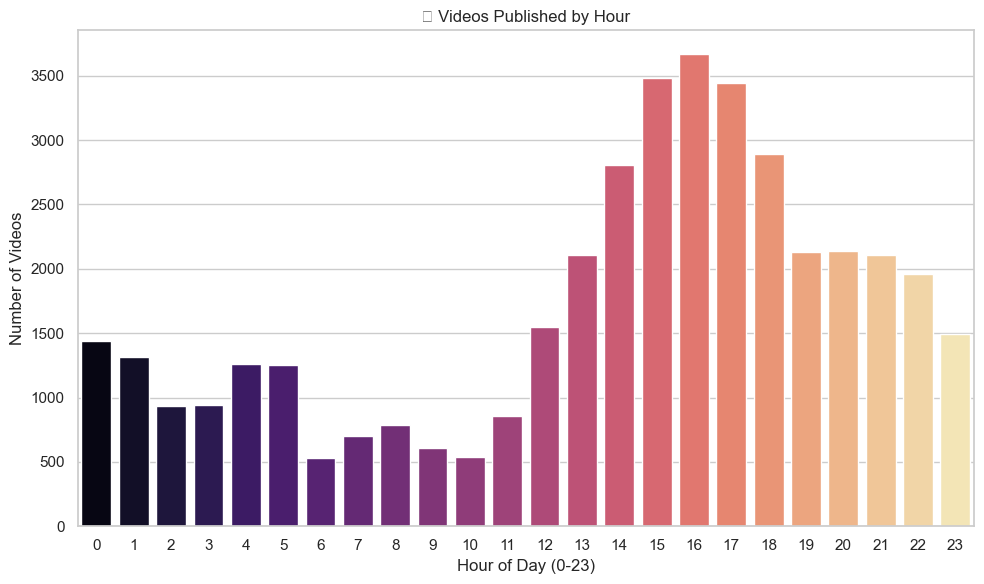

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\4196845428.py:88: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


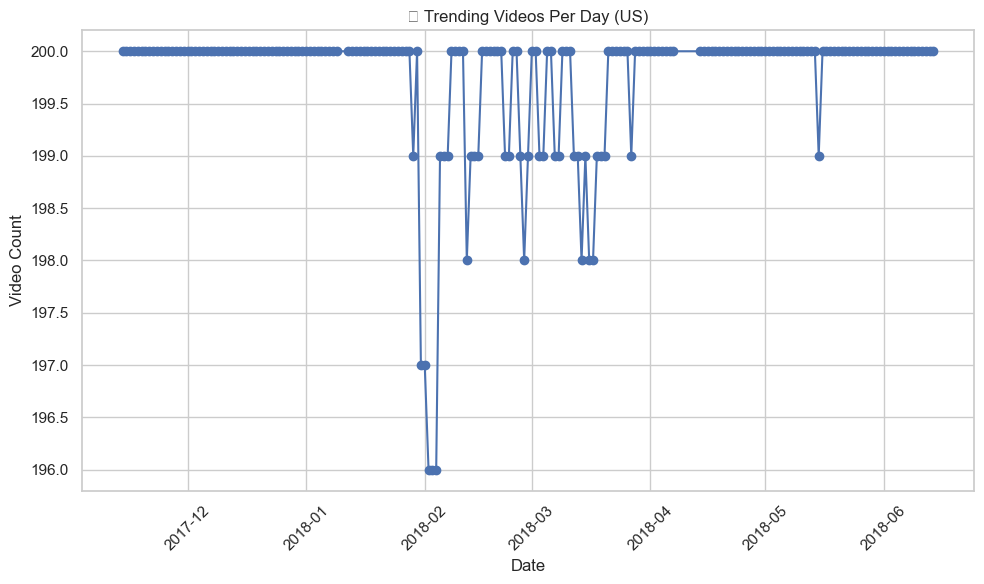


🎉 YouTube US Trend Analysis Complete.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

video_path = r'C:\Users\harini\Documents\analysis\USvideos.csv'
category_path = r'C:\Users\harini\Documents\analysis\US_category_id.json'

df = pd.read_csv(video_path)
print("✅ Loaded:", video_path)
print("Shape:", df.shape)

display(df.head())
print(df.columns)

with open(category_path, 'r') as f:
    category_data = json.load(f)

categories = pd.json_normalize(category_data["items"])
categories = categories[['id', 'snippet.title']]
categories.columns = ['category_id', 'category']

df['category_id'] = df['category_id'].astype(str)
categories['category_id'] = categories['category_id'].astype(str)
df = df.merge(categories, on='category_id', how='left')

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

print("\n🧪 Missing values:")
print(df.isnull().sum())

top_videos = df.sort_values('views', ascending=False).head(10)
plt.figure()
sns.barplot(x='views', y='title', data=top_videos)
plt.title('🔥 Top 10 Trending Videos by Views (US)')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df, x='likes', y='views', alpha=0.4)
plt.title('👍 Likes vs 👀 Views (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

top_categories = (
    df.groupby('category')['views']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("🏆 Top 10 Categories by Avg Views (US)")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='publish_hour', data=df, palette='magma')
plt.title("⏰ Videos Published by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

df['trending_date_only'] = df['trending_date'].dt.date
daily_trends = df.groupby('trending_date_only').size()

plt.figure()
daily_trends.plot(marker='o')
plt.title("📅 Trending Videos Per Day (US)")
plt.xlabel("Date")
plt.ylabel("Video Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🎉 YouTube US Trend Analysis Complete.")


✅ Loaded: C:\Users\harini\Documents\analysis\USvideos.csv
Shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

🧪 Missing values:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
publish_hour                0
dtype: int64


C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:53: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


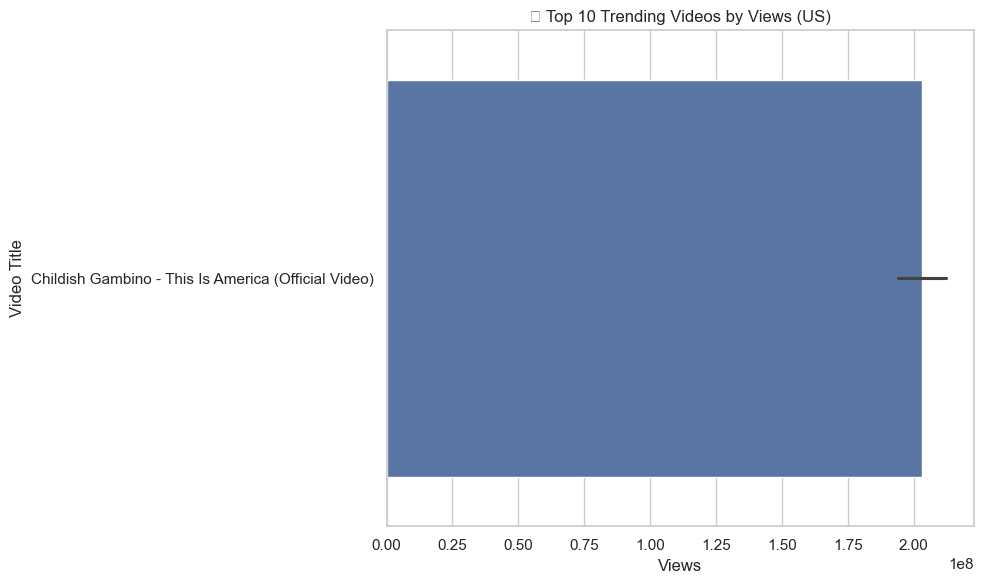

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:64: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


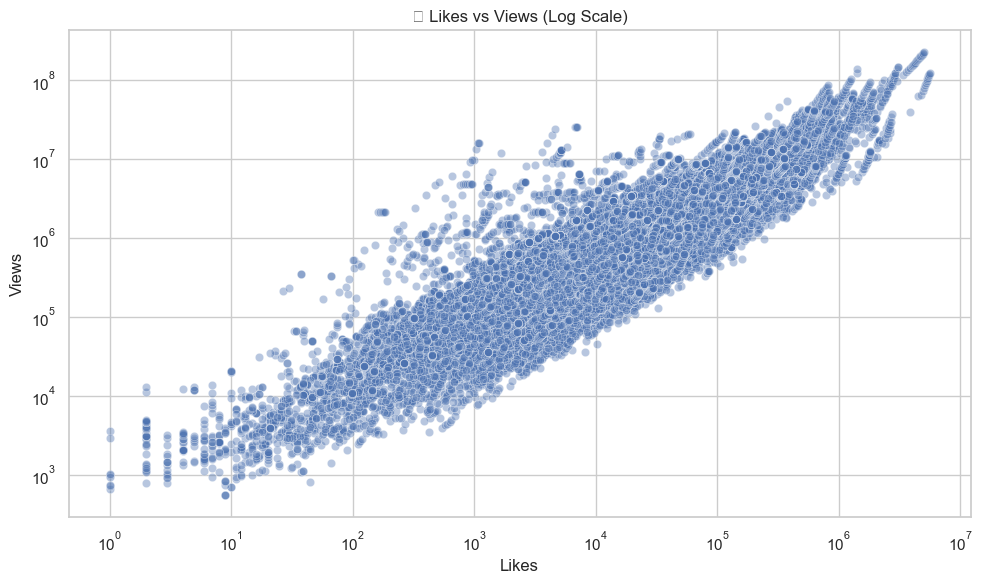

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:80: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


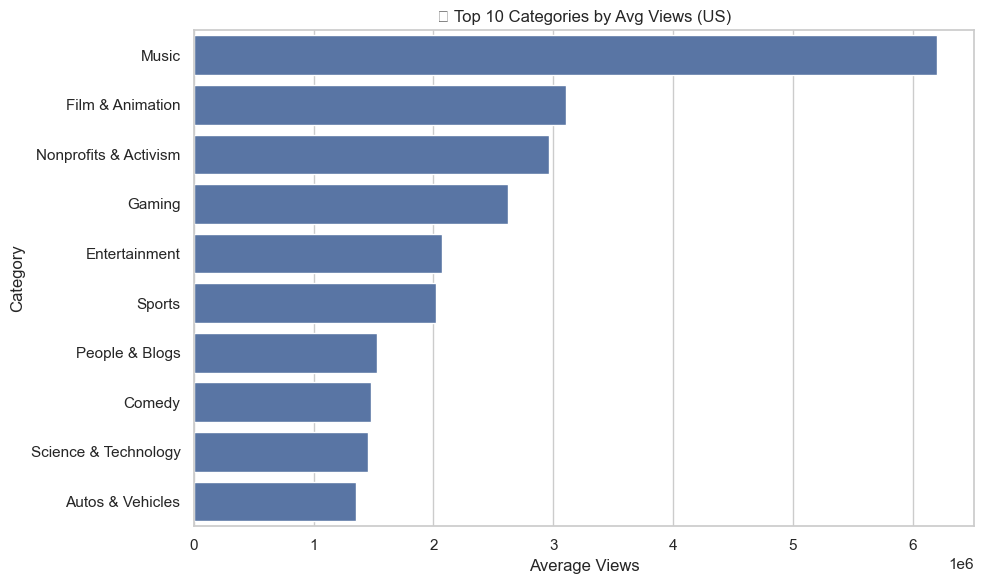

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=df, palette='magma', legend=False)
C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:89: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


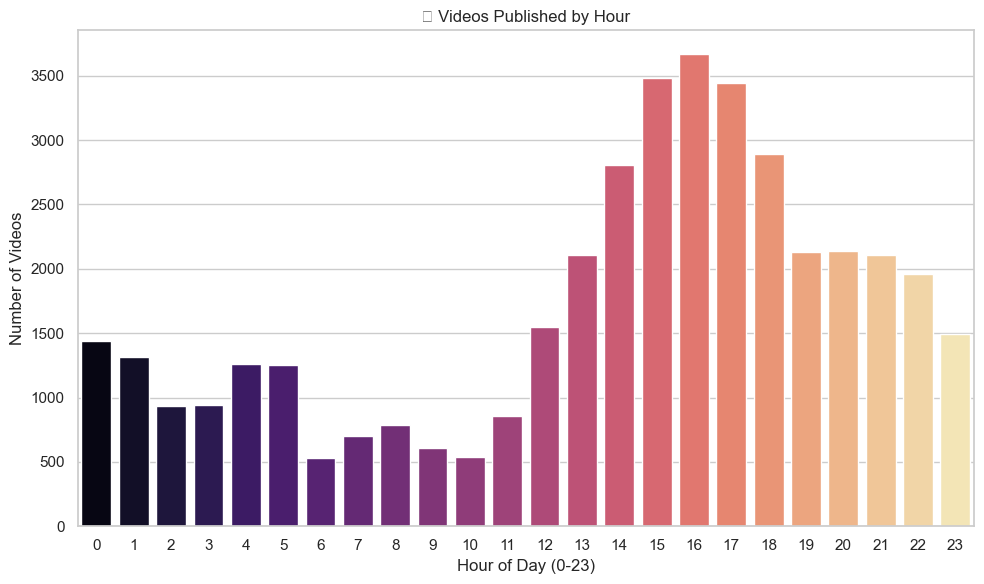

C:\Users\harini\AppData\Local\Temp\ipykernel_11008\2940704106.py:102: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\harini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


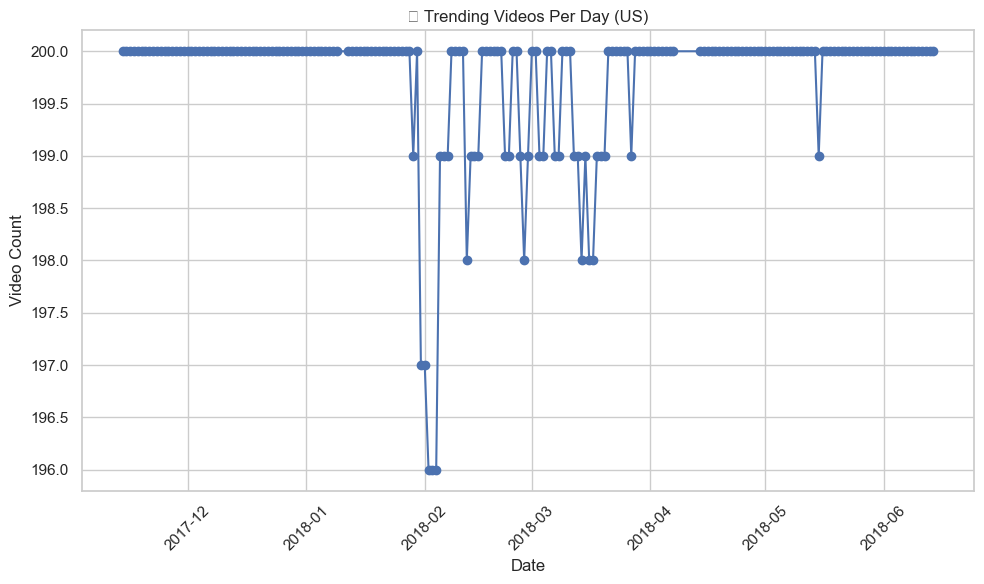


YouTube US Trend Analysis Complete.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Fix for emoji rendering on Windows (replace Arial with Segoe UI Emoji)
plt.rcParams['font.family'] = 'Segoe UI Emoji'

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Set your file paths here (update if needed)
video_path = r'C:\Users\harini\Documents\analysis\USvideos.csv'
category_path = r'C:\Users\harini\Documents\analysis\US_category_id.json'

# Load dataset
df = pd.read_csv(video_path)
print("✅ Loaded:", video_path)
print("Shape:", df.shape)

# Display first few rows and columns
display(df.head())
print(df.columns)

# Load category info
with open(category_path, 'r') as f:
    category_data = json.load(f)

categories = pd.json_normalize(category_data["items"])
categories = categories[['id', 'snippet.title']]
categories.columns = ['category_id', 'category']

# Merge category names into main dataframe
df['category_id'] = df['category_id'].astype(str)
categories['category_id'] = categories['category_id'].astype(str)
df = df.merge(categories, on='category_id', how='left')

# Convert dates
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

print("\n🧪 Missing values:")
print(df.isnull().sum())

# Top 10 trending videos by views
top_videos = df.sort_values('views', ascending=False).head(10)
plt.figure()
sns.barplot(x='views', y='title', data=top_videos)
plt.title('🔥 Top 10 Trending Videos by Views (US)')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

# Scatter plot: Likes vs Views (log scale)
plt.figure()
sns.scatterplot(data=df, x='likes', y='views', alpha=0.4)
plt.title('👍 Likes vs Views (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

# Top 10 categories by average views
top_categories = (
    df.groupby('category')['views']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("👀 Top 10 Categories by Avg Views (US)")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Count videos by publish hour
plt.figure()
sns.countplot(x='publish_hour', data=df, palette='magma', legend=False)
plt.title("⏰ Videos Published by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

# Trending videos per day
df['trending_date_only'] = df['trending_date'].dt.date
daily_trends = df.groupby('trending_date_only').size()

plt.figure()
daily_trends.plot(marker='o')
plt.title("📅 Trending Videos Per Day (US)")
plt.xlabel("Date")
plt.ylabel("Video Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nYouTube US Trend Analysis Complete.")


In [5]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

plt.rcParams['font.family'] = 'Segoe UI Emoji'  # keeps emojis rendering if possible


✅ Loaded: C:\Users\harini\Documents\analysis\USvideos.csv
Shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

🧪 Missing values:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
publish_hour                0
dtype: int64


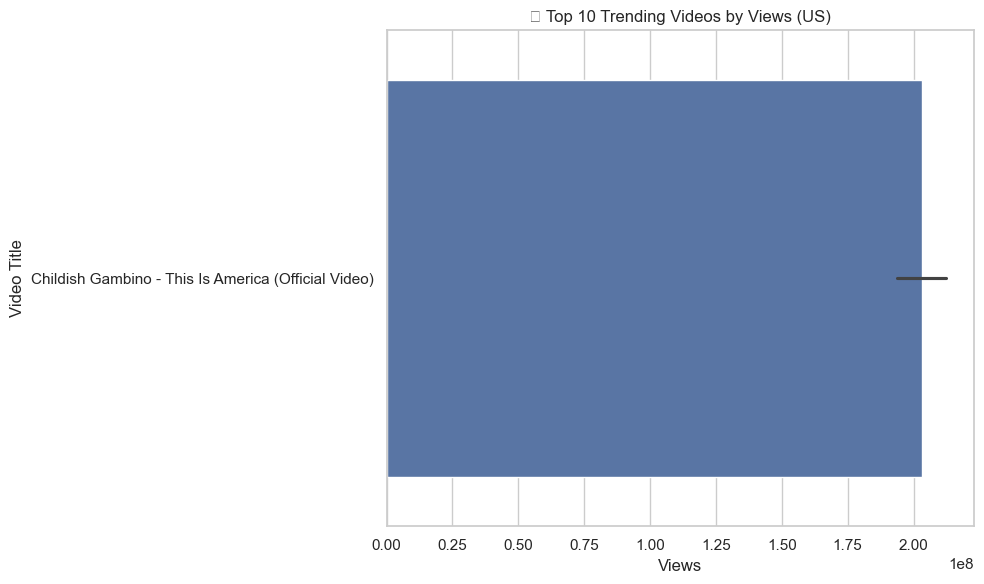

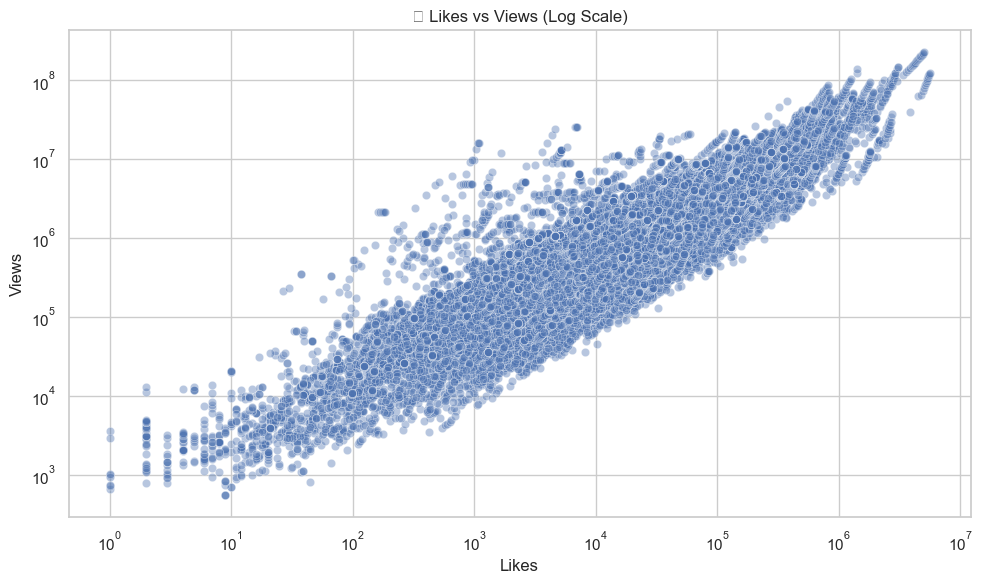

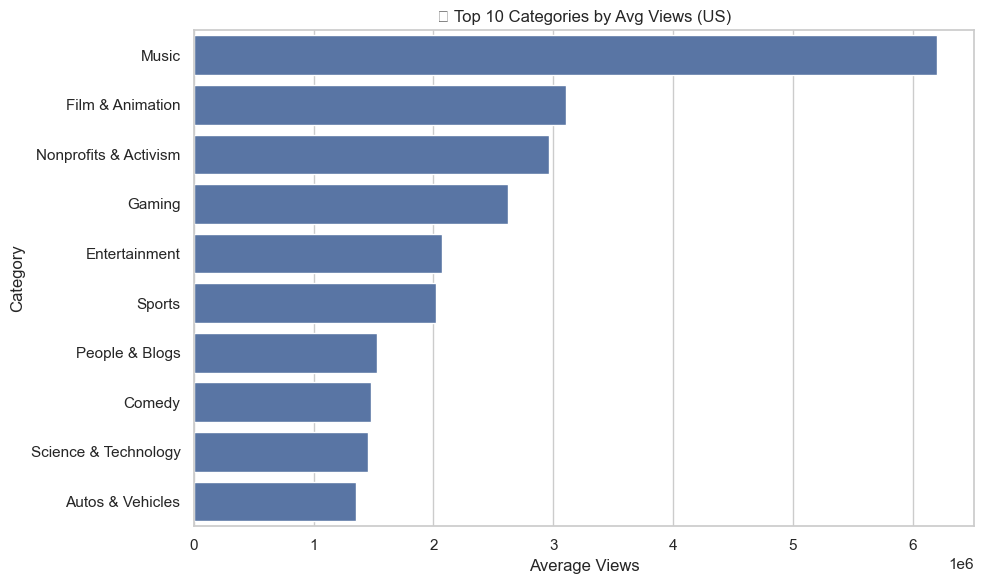

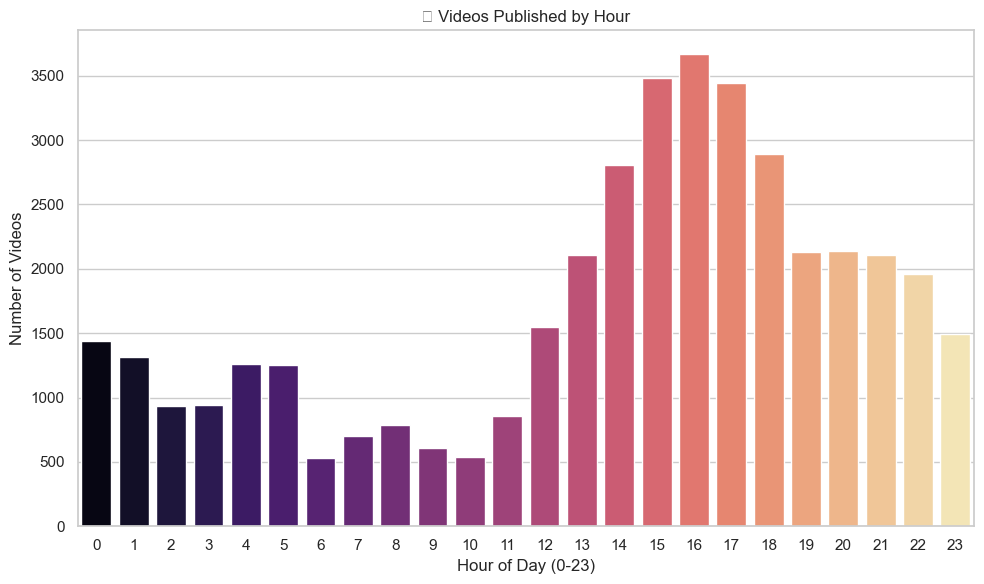

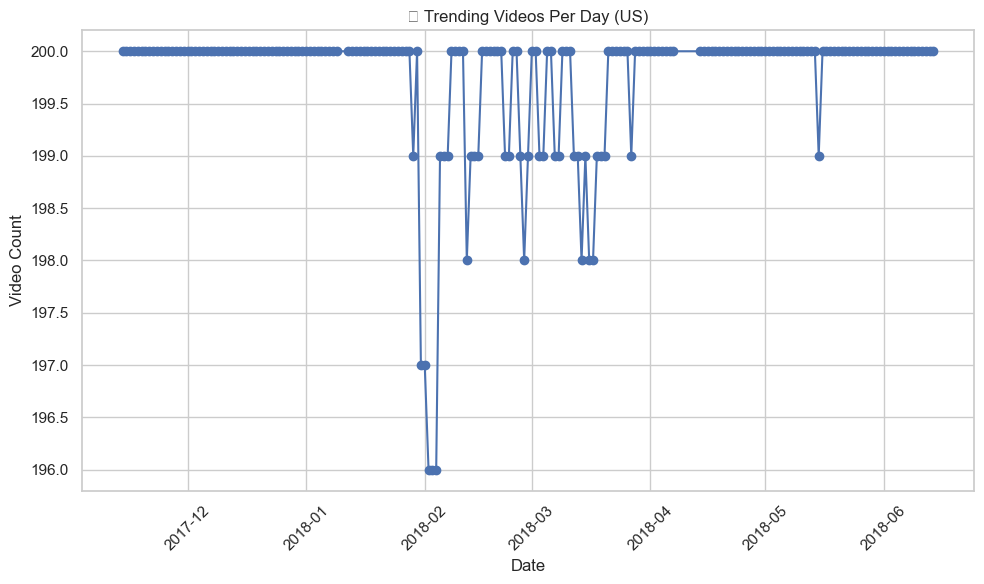


YouTube US Trend Analysis Complete.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Fix for emoji rendering on Windows (replace Arial with Segoe UI Emoji)
plt.rcParams['font.family'] = 'Segoe UI Emoji'

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Set your file paths here (update if needed)
video_path = r'C:\Users\harini\Documents\analysis\USvideos.csv'
category_path = r'C:\Users\harini\Documents\analysis\US_category_id.json'

# Load dataset
df = pd.read_csv(video_path)
print("✅ Loaded:", video_path)
print("Shape:", df.shape)

# Display first few rows and columns
display(df.head())
print(df.columns)

# Load category info
with open(category_path, 'r') as f:
    category_data = json.load(f)

categories = pd.json_normalize(category_data["items"])
categories = categories[['id', 'snippet.title']]
categories.columns = ['category_id', 'category']

# Merge category names into main dataframe
df['category_id'] = df['category_id'].astype(str)
categories['category_id'] = categories['category_id'].astype(str)
df = df.merge(categories, on='category_id', how='left')

# Convert dates
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

print("\n🧪 Missing values:")
print(df.isnull().sum())

# Top 10 trending videos by views
top_videos = df.sort_values('views', ascending=False).head(10)
plt.figure()
sns.barplot(x='views', y='title', data=top_videos)
plt.title('🔥 Top 10 Trending Videos by Views (US)')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

# Scatter plot: Likes vs Views (log scale)
plt.figure()
sns.scatterplot(data=df, x='likes', y='views', alpha=0.4)
plt.title('👍 Likes vs Views (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

# Top 10 categories by average views
top_categories = (
    df.groupby('category')['views']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("👀 Top 10 Categories by Avg Views (US)")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Count videos by publish hour
plt.figure()
sns.countplot(x='publish_hour', data=df, palette='magma', legend=False)
plt.title("⏰ Videos Published by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

# Trending videos per day
df['trending_date_only'] = df['trending_date'].dt.date
daily_trends = df.groupby('trending_date_only').size()

plt.figure()
daily_trends.plot(marker='o')
plt.title("📅 Trending Videos Per Day (US)")
plt.xlabel("Date")
plt.ylabel("Video Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nYouTube US Trend Analysis Complete.")


✅ Dataset loaded: C:\Users\harini\Documents\analysis\USvideos.csv
Shape: (40949, 16)


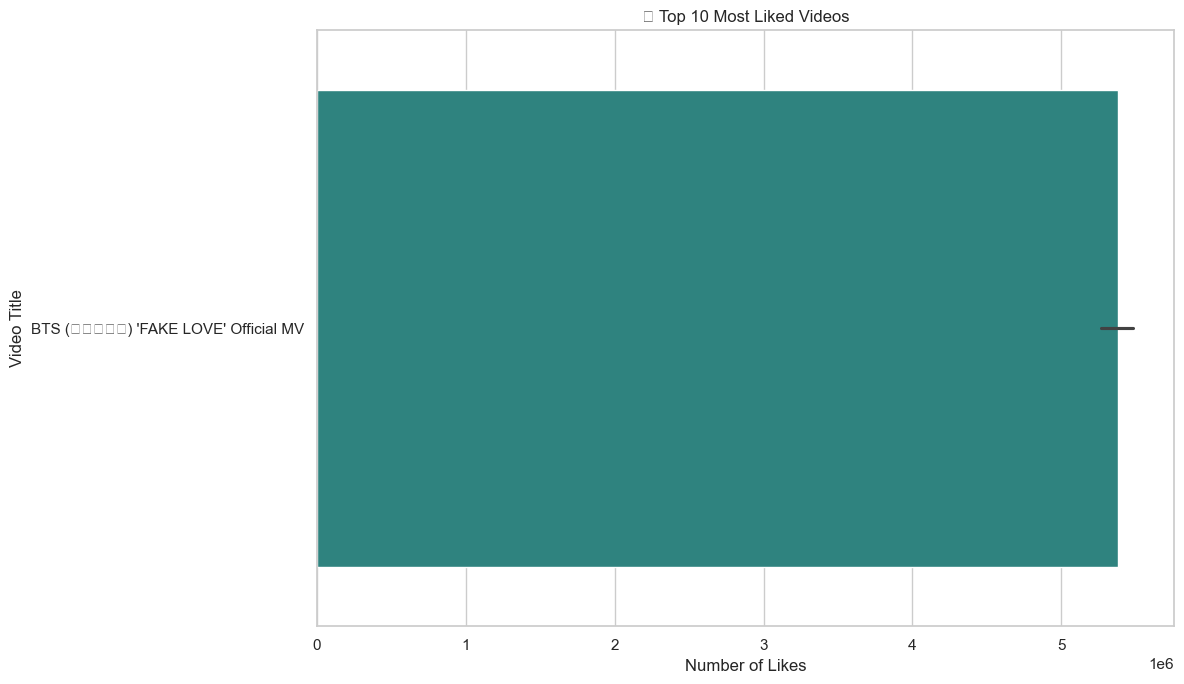

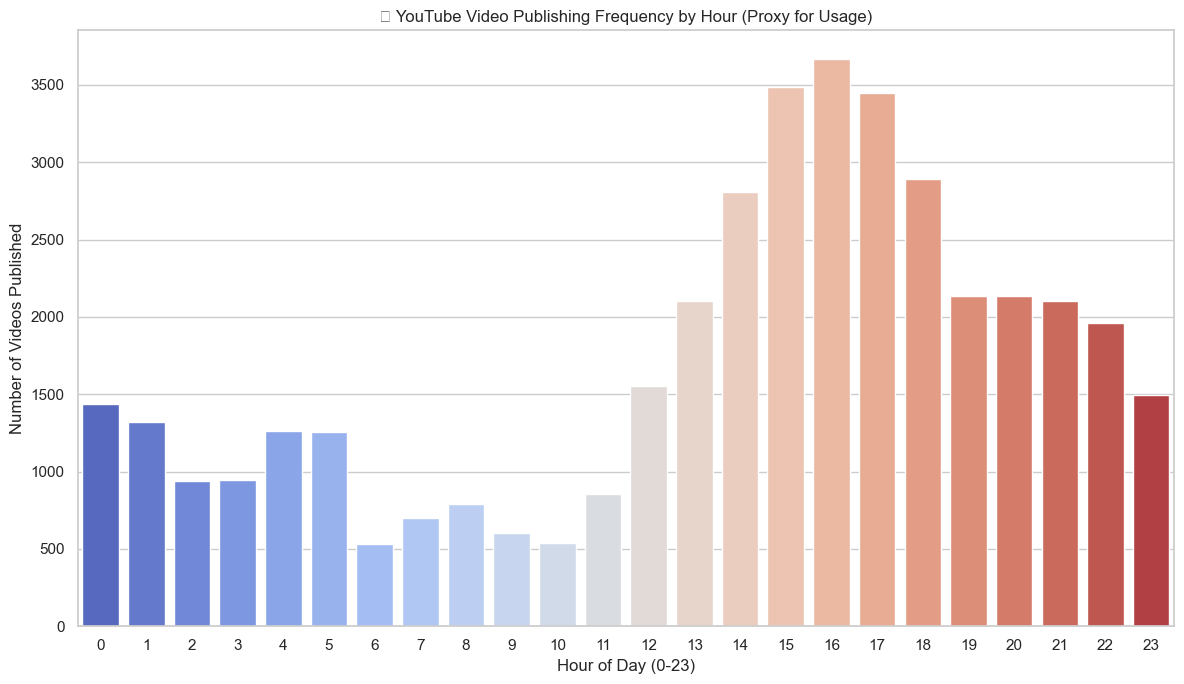

Column 'subscribers' not found. Using max views as proxy for popularity.


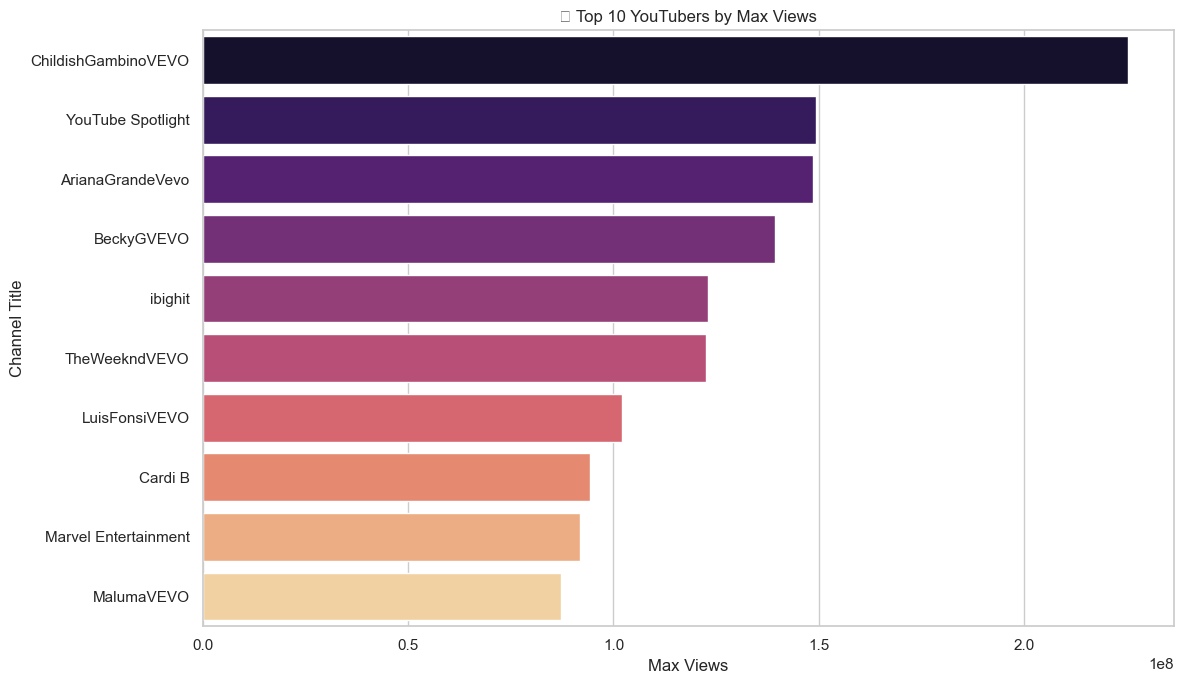

In [7]:
import warnings
warnings.filterwarnings("ignore")  # Hide warnings for clean output

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Segoe UI Emoji'
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Update your actual file path here
video_path = r'C:\Users\harini\Documents\analysis\USvideos.csv'

df = pd.read_csv(video_path)
print("✅ Dataset loaded:", video_path)
print("Shape:", df.shape)

# 1. Top 10 Most Liked Videos
top_liked = df.sort_values('likes', ascending=False).head(10)
plt.figure()
sns.barplot(x='likes', y='title', data=top_liked, palette='viridis')
plt.title('👍 Top 10 Most Liked Videos')
plt.xlabel('Number of Likes')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

# 2. Most active publishing hour (proxy for YouTube usage)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

plt.figure()
sns.countplot(x='publish_hour', data=df, palette='coolwarm')
plt.title('⏰ YouTube Video Publishing Frequency by Hour (Proxy for Usage)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Videos Published')
plt.tight_layout()
plt.show()

# 3. Top 10 YouTubers with Most Subscribers
# Note: 'channel_title' and 'subscribers' columns in your dataset?
# If 'subscribers' column does NOT exist, we use max likes/views as proxy.

if 'subscribers' in df.columns:
    channel_subs = df.groupby('channel_title')['subscribers'].max().sort_values(ascending=False).head(10)
else:
    print("Column 'subscribers' not found. Using max views as proxy for popularity.")
    channel_subs = df.groupby('channel_title')['views'].max().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=channel_subs.values, y=channel_subs.index, palette='magma')
plt.title('🏆 Top 10 YouTubers by Subscribers' if 'subscribers' in df.columns else '🏆 Top 10 YouTubers by Max Views')
plt.xlabel('Subscribers' if 'subscribers' in df.columns else 'Max Views')
plt.ylabel('Channel Title')
plt.tight_layout()
plt.show()


✅ Dataset loaded: C:\Users\harini\Documents\analysis\USvideos.csv
Shape: (40949, 16)


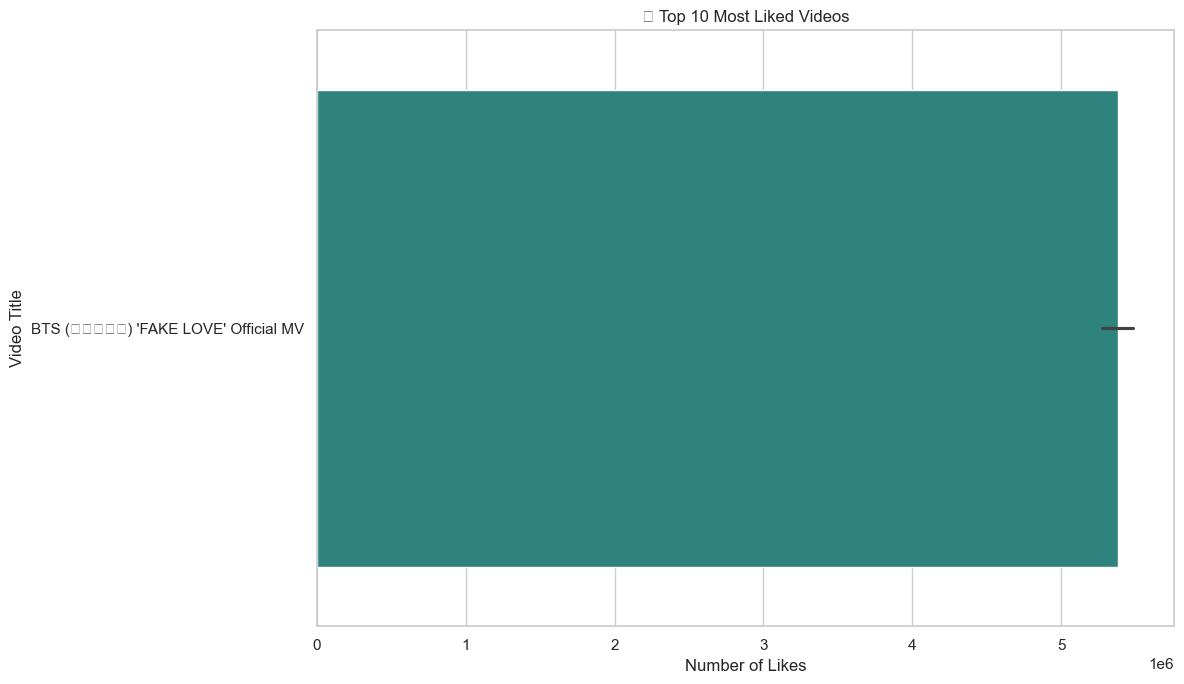

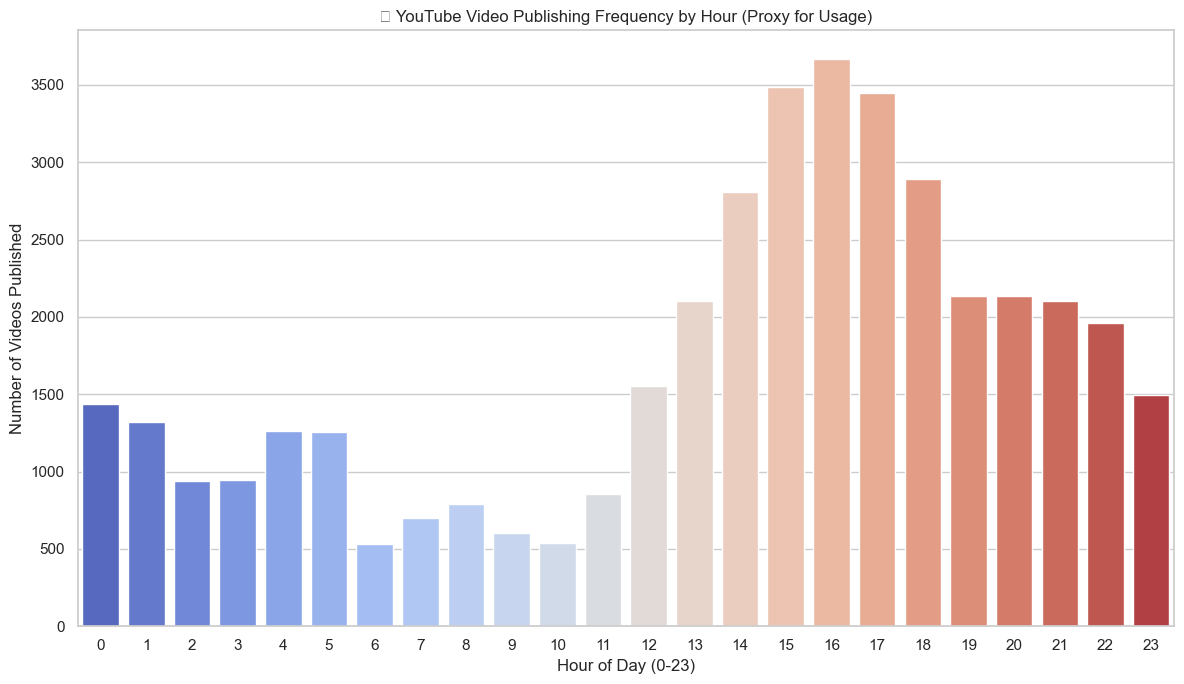

Column 'subscribers' not found. Using max views as proxy for popularity.


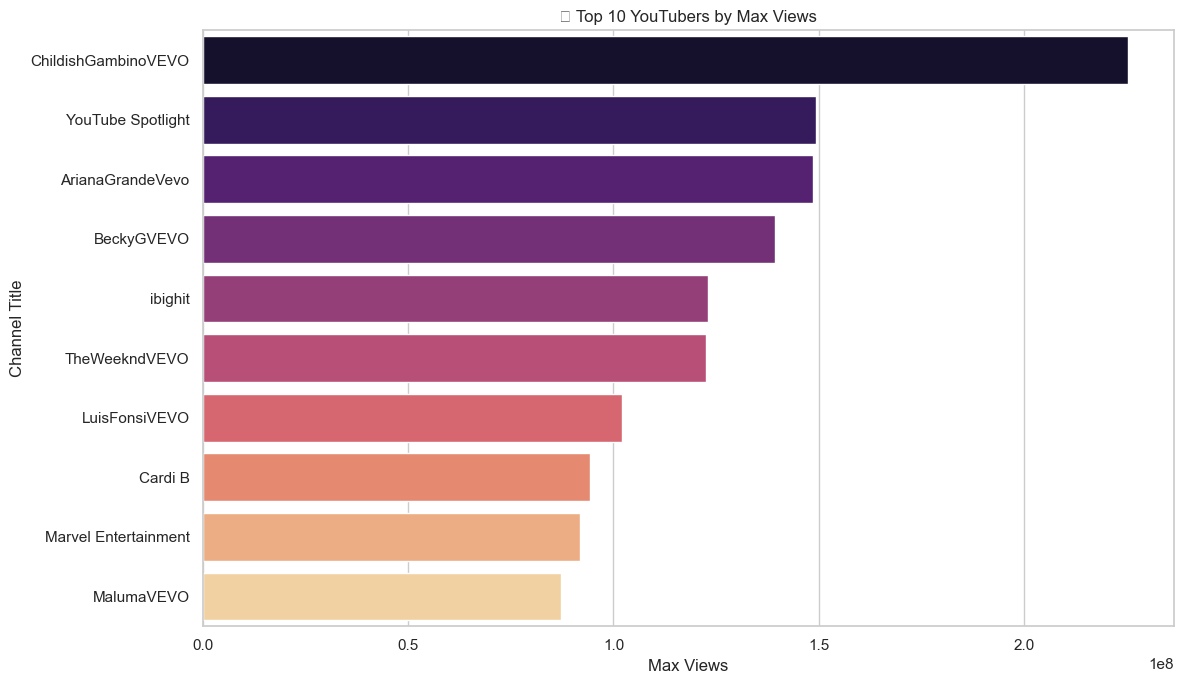

In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Segoe UI Emoji'
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

video_path = r'C:\Users\harini\Documents\analysis\USvideos.csv'

df = pd.read_csv(video_path)
print("✅ Dataset loaded:", video_path)
print("Shape:", df.shape)

top_liked = df.sort_values('likes', ascending=False).head(10)
plt.figure()
sns.barplot(x='likes', y='title', data=top_liked, palette='viridis')
plt.title('👍 Top 10 Most Liked Videos')
plt.xlabel('Number of Likes')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_hour'] = df['publish_time'].dt.hour

plt.figure()
sns.countplot(x='publish_hour', data=df, palette='coolwarm')
plt.title('⏰ YouTube Video Publishing Frequency by Hour (Proxy for Usage)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Videos Published')
plt.tight_layout()
plt.show()

if 'subscribers' in df.columns:
    channel_subs = df.groupby('channel_title')['subscribers'].max().sort_values(ascending=False).head(10)
else:
    print("Column 'subscribers' not found. Using max views as proxy for popularity.")
    channel_subs = df.groupby('channel_title')['views'].max().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=channel_subs.values, y=channel_subs.index, palette='magma')
plt.title('🏆 Top 10 YouTubers by Subscribers' if 'subscribers' in df.columns else '🏆 Top 10 YouTubers by Max Views')
plt.xlabel('Subscribers' if 'subscribers' in df.columns else 'Max Views')
plt.ylabel('Channel Title')
plt.tight_layout()
plt.show()
